In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
import numpy as np
import sklearn.cluster
import distance

df1 = pd.read_csv('MAUFullv2_3.csv')
df1.head()
# Read from file

,Name,Successful Invoices,First 24 Hour,Big Invoice Count,Overdue Invoices,Linked Name,Linked Acct,Acct Age,Big Transfer Count,Ssns,Emails,Phone Numbers,DoBs,Website,Job,Capitals,id
0,Adam Rebacz,0,0,0,0,0,0,214,0.00,1,1,1,1,False,Live Sound,2,600
1,Adam Yaeger,2,0,0,0,0,0,204,749.99,1,1,1,1,True,Digital Marketing,2,899
2,Adrianna Garcia,0,1,0,0,0,0,155,100.00,1,1,1,1,True,Event Planner,2,1551
3,Alesha Harris,0,1,0,0,0,0,218,0.00,1,1,1,1,False,General Labor,2,416
4,Alex Walton,0,2,0,0,0,0,220,0.00,1,1,1,1,False,Consulting,2,371


In [12]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

## Grouping

In [14]:
print(len(df1['Job']))
print(len(df1['Job'].dropna().unique()))

229
187


In [15]:
words = df1['Job'].dropna().unique() 
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])

In [16]:
from sklearn.manifold import TSNE
subSpace = TSNE().fit_transform(lev_similarity)

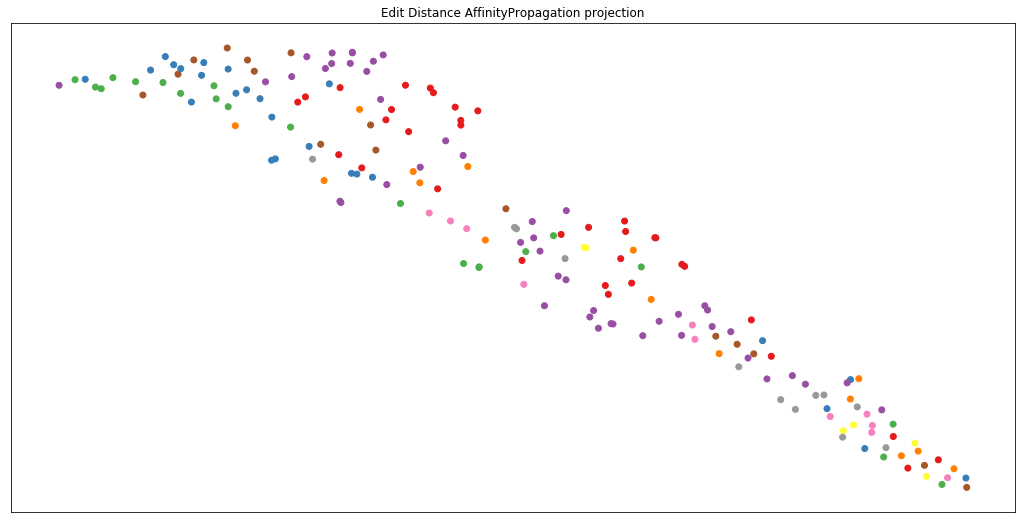

In [20]:
affprop = sklearn.cluster.AffinityPropagation(affinity="precomputed", convergence_iter=15, damping=0.9).fit(lev_similarity)
plot_embedding(subSpace, affprop.labels_, 'Edit Distance AffinityPropagation projection',47)

In [21]:
df3 = pd.DataFrame(words, columns=['Jobs'])
df3['labels'] = affprop.labels_
df3.head()

,Jobs,labels
0,Live Sound,32
1,Digital Marketing,0
2,Event Planner,25
3,General Labor,1
4,Consulting,2


In [22]:
df3 = df3.sort_values(by=['labels'])
print(df3.labels.max())
df3.head()

46


,Jobs,labels
28,Digital marketing,0
1,Digital Marketing,0
60,Digital Content,0
152,Electrical Wiring,0
48,Telecom/ Data Web,1


In [23]:
len(df3)

187

In [24]:
amounts = []
jobs = df3['Jobs'].values
for job in jobs:
    amounts.append(len(df1[df1['Job'] == job]))
df3['Amounts'] = amounts
df3.sort_values(by=['Amounts'], ascending=False).head()

,Jobs,labels,Amounts
4,Consulting,2,16
14,Retail,6,5
42,Director,6,4
84,Web Design,32,4
44,Construction,2,3


In [25]:
job = []
labels = []
amounts = []
for k in range(df3.labels.max()):
    df4 = df3[df3['labels'] == k]
    job.append(min(df4['Jobs'].values, key=len))
    labels.append(len(df4))
    amounts.append(df4['Amounts'].sum())
df5 = pd.DataFrame(job, columns=['Jobs'])
df5['size'] = labels
df5['density'] = amounts
df5.sort_values(by=['density'], ascending=False).head(15)

,Jobs,size,density
2,Consult,21,39
6,It,20,32
18,Driving,21,22
32,Media,12,17
15,Gym,14,15
16,Art Services,15,15
25,Freelance,10,14
1,General Labor,6,7
20,Web development,7,7
41,Online Retail,6,6


## Cutoff Determination

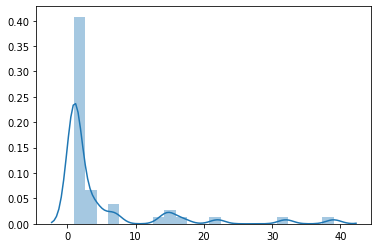

In [26]:
import seaborn as sns
df6 = df5.sort_values(by=['density'], ascending=False)
sns.distplot(df6.density.values)

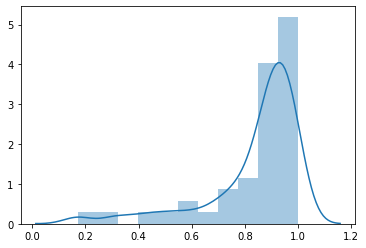

In [27]:
df6['total'] = df6.density.expanding(1).sum()
df6['percent'] = df6['total']/(df6['density'].sum())
sns.distplot(df6.percent.values)

In [28]:
df6.tail(20)

,Jobs,size,density,total,percent
31,Automotive and Home Cleaning Service,1,1,208.0,0.916300
36,Hair AND Beauty Salon,1,1,209.0,0.920705
23,"Hvac Installation Service, And Repair",1,1,210.0,0.925110
28,Accounting And business Turnaround Specialist,1,1,211.0,0.929515
12,Visual Artist/ Graphic Designer,1,1,212.0,0.933921
3,"photography, videography, graphic design",1,1,213.0,0.938326
4,Medical And Dental Supplies and Equipment,1,1,214.0,0.942731
5,Project Management / Architecture,1,1,215.0,0.947137
8,Photography & Art Direction,1,1,216.0,0.951542
9,"Design, Photography, IT Consulting",1,1,217.0,0.955947


In [ ]:
# change lev distance with word2vec or glove

In [ ]:
job_dict = dict(zip(positions, range(len(positions))))
df1 = df.replace({'Pos': po_dict})